## 旧暦日付から六曜を算出する

In [25]:
def six_day(month,day):
    return ['大安','赤口','先勝','友引',\
     '先負','仏滅'][(month+day)%6]
print(six_day(1,1))

先勝


## 朔の日時を算出する関数を作る

In [12]:
import ephem, datetime, pytz
def new_moon_days(start_day,end_day):
    jst=pytz.timezone('Asia/Tokyo') # 日本標準時(明石)
    jpn = ephem.Observer();jpn.lat='34.65';jpn.lon='135.00'# 観測地＝明石
    current_date=start_day;end_date=ephem.Date(end_day) # 算出期間を設定
    new_moon_datetimes=[] # 朔となる日時を格納する
    next_new_moon=ephem.previous_new_moon(current_date)
    new_moon_datetimes.append(jst.localize(ephem.localtime(next_new_moon)))
    current_date=ephem.previous_new_moon(current_date)
    while current_date < end_date: # 指定範囲を覆うように朔日時を格納する
        next_new_moon=ephem.next_new_moon(current_date) # datetime.datetime
        new_moon_datetimes.append(jst.localize(ephem.localtime(next_new_moon)))
        current_date=next_new_moon
    return new_moon_datetimes

#print(new_moon_days(datetime.date(2025,1,1), datetime.date(2025,12,31)))

In [22]:
nmd=new_moon_days(datetime.date(2033,1,1),
                  datetime.date(2034,12,31))
print([d.strftime(' %Y/%m/%d %H:%M:%S')for d in nmd])

[' 2032/12/03 05:52:43', ' 2033/01/01 19:16:51', ' 2033/01/31 06:59:41', ' 2033/03/01 17:23:21', ' 2033/03/31 02:51:28', ' 2033/04/29 11:46:00', ' 2033/05/28 20:36:22', ' 2033/06/27 06:06:51', ' 2033/07/26 17:12:22', ' 2033/08/25 06:39:36', ' 2033/09/23 22:39:35', ' 2033/10/23 16:28:14', ' 2033/11/22 10:38:57', ' 2033/12/22 03:46:18', ' 2034/01/20 19:01:21', ' 2034/02/19 08:10:03', ' 2034/03/20 19:14:23', ' 2034/04/19 04:25:42', ' 2034/05/18 12:12:23', ' 2034/06/16 19:25:44', ' 2034/07/16 03:15:02', ' 2034/08/14 12:52:50', ' 2034/09/13 01:13:36', ' 2034/10/12 16:32:28', ' 2034/11/11 10:16:03', ' 2034/12/11 05:14:13', ' 2035/01/10 00:02:54']


## 開始年前年の冬至から終了年の年末まで、二十四節気の「十二中気」日時を算出する関数を作る

In [3]:
import eacal # start_yearの前年冬至からend_year年末まで十二中気日時を算出
def twelve_seasons(start_year,end_year):
    my_eacal = eacal.EACal(ja=True);events12=[];is_start=False
    for y in range(start_year-1,end_year+1):
        for i, e in enumerate(my_eacal.get_annual_solar_terms(y)):
            if e[0]=='冬至':
                is_start=True
            if is_start and i%2==1: # 十二中気のみ抽出
                events12.append({'中気':e[0],'datetime':e[2]})
    return events12

#print(twelve_seasons(2025,2025))

In [20]:
print([c['中気']+c['datetime'].strftime(' %Y/%m/%d %H:%M:%S')for c in twelve_seasons(2033,2034)])

['冬至 2032/12/21 16:55:35', '大寒 2033/01/20 03:32:24', '雨水 2033/02/18 17:33:27', '春分 2033/03/20 16:22:28', '穀雨 2033/04/20 03:12:58', '小満 2033/05/21 02:10:51', '夏至 2033/06/21 10:01:03', '大暑 2033/07/22 20:52:44', '処暑 2033/08/23 04:01:42', '秋分 2033/09/23 01:51:28', '霜降 2033/10/23 11:27:19', '小雪 2033/11/22 09:15:49', '冬至 2033/12/21 22:45:36', '大寒 2034/01/20 09:26:53', '雨水 2034/02/18 23:29:50', '春分 2034/03/20 22:17:11', '穀雨 2034/04/20 09:03:29', '小満 2034/05/21 07:56:45', '夏至 2034/06/21 15:44:04', '大暑 2034/07/23 02:36:14', '処暑 2034/08/23 09:47:36', '秋分 2034/09/23 07:39:20', '霜降 2034/10/23 17:16:10', '小雪 2034/11/22 15:04:37', '冬至 2034/12/22 04:33:37']


## 各暦月に含まれる中気を調べる関数、月名を決定する関数を作る

In [11]:
import copy # 隣り合う朔日(朔日時が含まれる0時から23時59分59秒999ms)の間に含まれる中気を算出
def calc_events_in_months(new_moon_datetimes,events12):
    events_in_months=[]
    for i in range(len(new_moon_datetimes)-1):
        event_in_months=[{e['中気']:e['datetime'].strftime('(%Y/%m/%d %H:%M)')} for e in events12 \
            if new_moon_datetimes[i].replace(hour=0,minute=0,second=0,microsecond=0)<=e['datetime'] \
                and e['datetime']<new_moon_datetimes[i+1].replace(hour=0,minute=0,second=0,microsecond=0)]
        events_in_months.append({"newmoon":new_moon_datetimes[i],"events":event_in_months,
            "1stday":new_moon_datetimes[i].replace(hour=0,minute=0,second=0,microsecond=0)})
    return events_in_months
def assign_name(events_in_months):
    result=copy.deepcopy(events_in_months[0:len(events_in_months)-1])
    for r in result:
        r['name']=None
        for e in r['events']:
            switch={'春分':2,'夏至':5,'秋分':8,'冬至':11}
            for k in switch:
                if k in e.keys():
                    r['name']=switch[k]
    for i,r in enumerate(result):#中気を含む場合、前月参照で月決定
        if not r['name'] and r['events'] and result[i-1]['name']:
            if result[i-1]['name']==12:
                r['name']=1
            else:
                r['name']=result[i-1]['name']+1
    for i in range(len(result)-2,1,-1):#中気を含む場合は後月参照
        if result[i]['events'] and result[i+1]['name']:
            if not result[i]['name']:
                if result[i+1]['name']==1:
                    result[i]['name']=12
                else:
                    result[i]['name']=result[i+1]['name']-1
            elif result[i]['name']!=result[i+1]['name']-1:
                if not(result[i]['name']==12 and \
                       result[i+1]['name']==1): 
                    print("月名数字の矛盾が発生しました。")
    names=[e['name'] for e in result]
    if names.count(None)==1:
        idx=names.index(None)
        result[idx]['name']='閏'+str(result[idx-1]['name'])
    elif names.count(None)>1:
                print("閏月決定ができませんでした。")        
    return result

## 算出する

In [10]:
start_year=2025; end_year=2026
events12=twelve_seasons(start_year,end_year)# 中気を算出
new_moon_datetimes=new_moon_days(# 朔月を算出
    events12[0]['datetime'],datetime.date(end_year,12,31))
# 朔月に含まれる中気を算出する
events_in_months=calc_events_in_months(new_moon_datetimes,events12)
result=assign_name(events_in_months) # 月名と閏月を算出する
for r in result:
    print(r['name'],'月：',r['1stday'].strftime('%Y/%m/%d〜'),':',r['events'])

11 月： 2024/12/01〜 : [{'冬至': '(2024/12/21 18:20)'}]
12 月： 2024/12/31〜 : [{'大寒': '(2025/01/20 04:59)'}]
1 月： 2025/01/29〜 : [{'雨水': '(2025/02/18 19:06)'}]
2 月： 2025/02/28〜 : [{'春分': '(2025/03/20 18:01)'}]
3 月： 2025/03/29〜 : [{'穀雨': '(2025/04/20 04:56)'}]
4 月： 2025/04/28〜 : [{'小満': '(2025/05/21 03:54)'}]
5 月： 2025/05/27〜 : [{'夏至': '(2025/06/21 11:42)'}]
6 月： 2025/06/25〜 : [{'大暑': '(2025/07/22 22:29)'}]
閏6 月： 2025/07/25〜 : []
7 月： 2025/08/23〜 : [{'処暑': '(2025/08/23 05:33)'}]
8 月： 2025/09/22〜 : [{'秋分': '(2025/09/23 03:19)'}]
9 月： 2025/10/21〜 : [{'霜降': '(2025/10/23 12:50)'}]
10 月： 2025/11/20〜 : [{'小雪': '(2025/11/22 10:35)'}]
11 月： 2025/12/20〜 : [{'冬至': '(2025/12/22 00:02)'}]
12 月： 2026/01/19〜 : [{'大寒': '(2026/01/20 10:44)'}]
1 月： 2026/02/17〜 : [{'雨水': '(2026/02/19 00:51)'}]
2 月： 2026/03/19〜 : [{'春分': '(2026/03/20 23:45)'}]
3 月： 2026/04/17〜 : [{'穀雨': '(2026/04/20 10:39)'}]
4 月： 2026/05/17〜 : [{'小満': '(2026/05/21 09:36)'}]
5 月： 2026/06/15〜 : [{'夏至': '(2026/06/21 17:24)'}]
6 月： 2026/07/14〜 : [{'

In [9]:
start_year=2033; end_year=2034
events12=twelve_seasons(start_year,end_year)# 中気を算出
new_moon_datetimes=new_moon_days(# 指定年の前年冬至から指定年の年末まで朔月算出
    events12[0]['datetime'],datetime.date(end_year,12,31))
# 朔月に含まれる中気を算出する
events_in_months=calc_events_in_months(new_moon_datetimes,events12)
result=assign_name(events_in_months) # 月名と閏月を算出する
for r in result: # 結果出力
    print(r['name'],'月：',r['1stday'].strftime('%Y/%m/%d〜'),':',r['events'])

月名数字の矛盾が発生しました。
閏月決定ができませんでした。
11 月： 2032/12/03〜 : [{'冬至': '(2032/12/21 16:55)'}]
12 月： 2033/01/01〜 : [{'大寒': '(2033/01/20 03:32)'}]
1 月： 2033/01/31〜 : [{'雨水': '(2033/02/18 17:33)'}]
2 月： 2033/03/01〜 : [{'春分': '(2033/03/20 16:22)'}]
3 月： 2033/03/31〜 : [{'穀雨': '(2033/04/20 03:12)'}]
4 月： 2033/04/29〜 : [{'小満': '(2033/05/21 02:10)'}]
5 月： 2033/05/28〜 : [{'夏至': '(2033/06/21 10:01)'}]
6 月： 2033/06/27〜 : [{'大暑': '(2033/07/22 20:52)'}]
7 月： 2033/07/26〜 : [{'処暑': '(2033/08/23 04:01)'}]
None 月： 2033/08/25〜 : []
8 月： 2033/09/23〜 : [{'秋分': '(2033/09/23 01:51)'}]
9 月： 2033/10/23〜 : [{'霜降': '(2033/10/23 11:27)'}]
11 月： 2033/11/22〜 : [{'小雪': '(2033/11/22 09:15)'}, {'冬至': '(2033/12/21 22:45)'}]
None 月： 2033/12/22〜 : []
None 月： 2034/01/20〜 : [{'大寒': '(2034/01/20 09:26)'}, {'雨水': '(2034/02/18 23:29)'}]
None 月： 2034/02/19〜 : []
2 月： 2034/03/20〜 : [{'春分': '(2034/03/20 22:17)'}]
3 月： 2034/04/19〜 : [{'穀雨': '(2034/04/20 09:03)'}]
4 月： 2034/05/18〜 : [{'小満': '(2034/05/21 07:56)'}]
5 月： 2034/06/16〜 : [{'夏至': '

## 分析する

月名数字の矛盾が発生しました。
閏月決定ができませんでした。


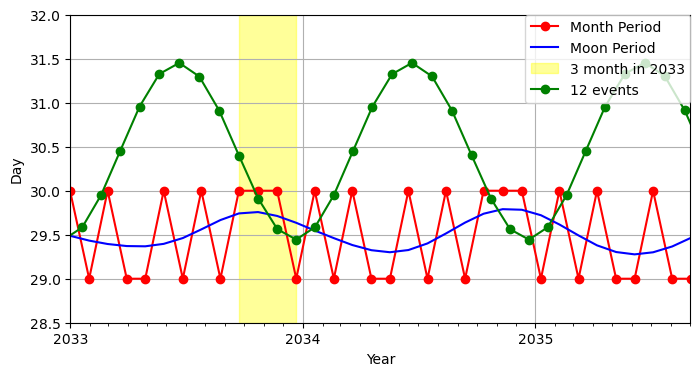

In [7]:
start_year=2033; end_year=2035
events12=twelve_seasons(start_year,end_year)# 中気を算出
new_moon_datetimes=new_moon_days(# 指定年の前年冬至から指定年の年末まで朔月算出
    events12[0]['datetime'],datetime.date(end_year,12,31))
# 朔月に含まれる中気を算出する
events_in_months=calc_events_in_months(new_moon_datetimes,events12)
result=assign_name(events_in_months) # 月名と閏月を算出する
#=======上記まではデータ生成（新たに貼り付ける必要はない）

import matplotlib.pyplot as plt;from matplotlib.dates import MonthLocator, YearLocator
dates=[];periods_of_month=[];periods_of_newmoon=[]
for i in range(len(result)-1):
    dates.append(result[i]['1stday'])
    periods_of_month.append(ephem.Date(result[i+1]['1stday'])-ephem.Date(result[i]['1stday']))
    periods_of_newmoon.append(ephem.Date(result[i+1]['newmoon'])-ephem.Date(result[i]['newmoon']))
fig = plt.figure(figsize=(8,4));ax = plt.axes()
ax.plot(dates,periods_of_month,label='Month Period',marker='o',color='red')
ax.plot(dates,periods_of_newmoon,label='Moon Period',color='blue')
ax.set_xlim([datetime.datetime(2033,1,1),datetime.datetime(2035,9,1)])
ax.axvspan(datetime.datetime(2033,9,23),datetime.datetime(2033,12,21),
           label="3 month in 2033",color="yellow",alpha=0.4)
periods_center=[]
for i in range(len(events12)-1):
    delta=events12[i+1]['datetime']-events12[i]['datetime']
    periods_center.append(delta.days+delta.seconds/(24*60*60))
ax.plot([e['datetime']for e in events12][:-1],periods_center,
        label='12 events',marker='o',color='green')
ax.set_ylabel('Day'); ax.set_xlabel('Year');ax.set_ylim([28.5, 32])
yloc = YearLocator();mloc = MonthLocator()
ax.xaxis.set_major_locator(yloc); ax.xaxis.set_minor_locator(mloc)
ax.legend(bbox_to_anchor=(1,1),loc='upper right',borderaxespad=0)
ax.grid(True);plt.show()